In [5]:
import numpy as np
import requests
import pandas as pd  
import matplotlib.pyplot as plt


In [3]:


# key = key ="497b8f719eca7942be1ea0fd731e88517396bdfb"
# # Defineing the endpoint and parameters
# ticker = "MSFT"  # Fetching data for Microsoft (MSFT)
# url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
# params = {
#     'token': key,
#     'startDate': '2015-01-01',
#     'endDate': '2024-05-10'
# }

# response = requests.get(url,params=params)




In [4]:
# if response.status_code == 200:
    
#     df = pd.DataFrame(response.json())

#     df.to_csv('MFST.csv',index = False)

# else:
#     print(f"Failed to fetch data : {response.status_code}")

NameError: name 'response' is not defined

In [6]:
df = pd.read_csv('MFST.csv')
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02T00:00:00.000Z,46.760,47.4200,46.54,46.66,27913852,40.304641,40.873526,40.115012,40.218446,27913852,0.0,1.0
1,2015-01-05T00:00:00.000Z,46.325,46.7300,46.25,46.37,39673865,39.929694,40.278782,39.865048,39.968481,39673865,0.0,1.0
2,2015-01-06T00:00:00.000Z,45.650,46.7490,45.54,46.38,36447854,39.347880,40.295159,39.253065,39.977101,36447854,0.0,1.0
3,2015-01-07T00:00:00.000Z,46.230,46.4600,45.49,45.98,29114061,39.847809,40.046057,39.209968,39.632322,29114061,0.0,1.0
4,2015-01-08T00:00:00.000Z,47.590,47.7499,46.72,46.75,29645202,41.020057,41.157882,40.270163,40.296021,29645202,0.0,1.0


In [7]:
df = df.reset_index()['close']


df2 = df.to_numpy()

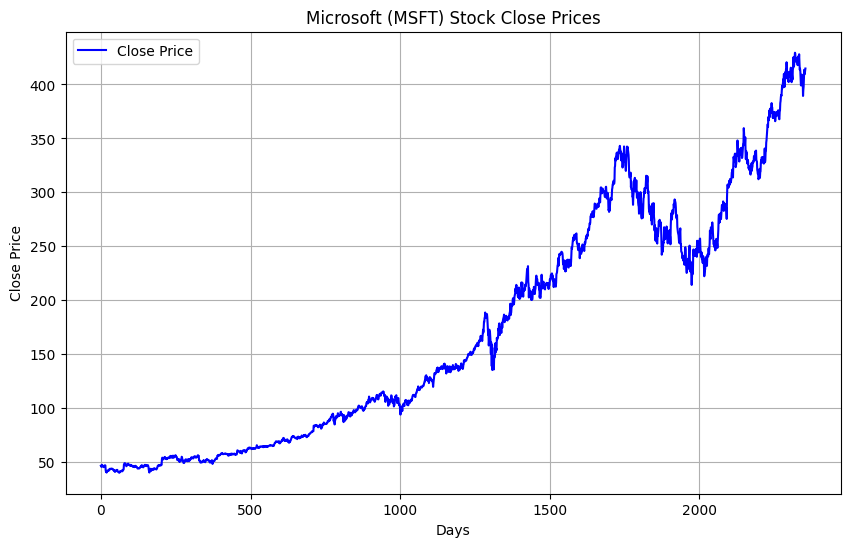

In [8]:
import matplotlib.pyplot as plt

# Plotting the 'close' prices
plt.figure(figsize=(10, 6))
plt.plot(df2, color='blue', label='Close Price')
plt.title('Microsoft (MSFT) Stock Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
def create_data(df,timestep):
    x=[]
    y=[]

    for i in range(len(df)-timestep):
        
        
        x.append(df[i:i+timestep])
        y.append(df[i+timestep])

    return np.array(x),np.array(y)





In [10]:
size = int(len(df2)*0.7)
train,test = df2[0:size],df2[size:]

print(len(train),len(test))
timestep = 100

1648 707


In [11]:
xtrain ,ytrain = create_data(train,100)


In [12]:
xtest,ytest = create_data(test,100)

In [13]:
from sklearn.preprocessing import MinMaxScaler

fscaler = MinMaxScaler()
scaler = MinMaxScaler()

xtrain = fscaler.fit_transform(xtrain)
xtest = fscaler.transform(xtest)
ytrain = scaler.fit_transform(ytrain.reshape(-1,1))
ytest = scaler.transform(ytest.reshape(-1,1))




In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


model = Sequential()
model.add(LSTM(units=50,return_sequences = True,input_shape = (timestep,1)))
model.add(LSTM(units=50,return_sequences = True))
model.add(LSTM(units=50))
model.add(Dense(units =1))

model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs = 100,batch_size = 64,verbose=1)

train_loss = model.evaluate(xtrain,ytrain,verbose=0)





Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0719 - val_loss: 0.0124
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0024 - val_loss: 0.0252
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 6.6665e-04 - val_loss: 0.0151
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 5.1117e-04 - val_loss: 0.0140
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 5.9756e-04 - val_loss: 0.0118
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 5.8973e-04 - val_loss: 0.0095
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 5.4206e-04 - val_loss: 0.0102
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 5.3535e-04 - val_loss: 0.0119
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 5.5465e-04 - val_loss: 0.0093
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 5.3472e-04 - val_loss: 0.0081
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 5.6898e-04 - val_loss: 0.0072
Epoch

In [17]:
test_loss = model.evaluate(xtest,ytest,verbose=0)
print(f"Train Loss : {train_loss}")
print(f"Test Loss : {test_loss}")

Train Loss : 0.0001311362866545096
Test Loss : 0.0007754889084026217


In [18]:
from sklearn.metrics import mean_squared_error
import math

ytrain_pred = model.predict(xtrain)
ytest_pred = model.predict(xtest)

ytrain_pred = model.predict(ytrain_pred)
ytest_pred = model.predict(ytest_pred)

ytrain_act = scaler.inverse_transform(ytrain)
ytest_act = scaler.inverse_transform(ytest)

ytrain_pred = scaler.inverse_transform(ytrain_pred)
ytest_pred = scaler.inverse_transform(ytest_pred)


trainrmse = math.sqrt(mean_squared_error(ytrain_act,ytrain_pred))
testrmse = math.sqrt(mean_squared_error(ytest_act,ytest_pred))

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [19]:
print(f"Train RMSE: {trainrmse}")
print(f"Test RMSE: {testrmse}")

Train RMSE: 83.15269629284418
Test RMSE: 228.4931452187132


In [20]:
ytrain_pred

array([[46.19949 ],
       [46.19565 ],
       [46.191948],
       ...,
       [79.58793 ],
       [79.5037  ],
       [79.07042 ]], dtype=float32)

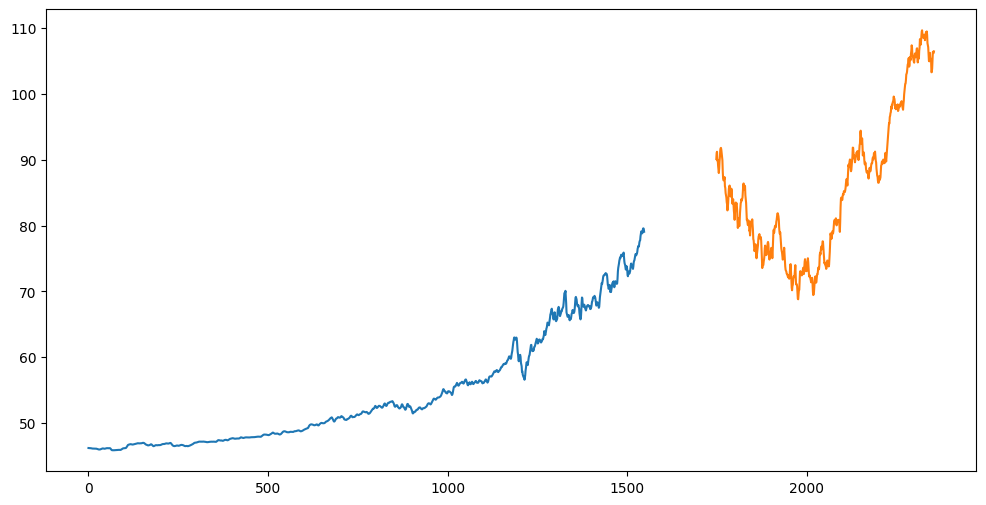

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(ytrain_pred)
plt.plot(df.index[-len(ytest_pred):],ytest_pred)

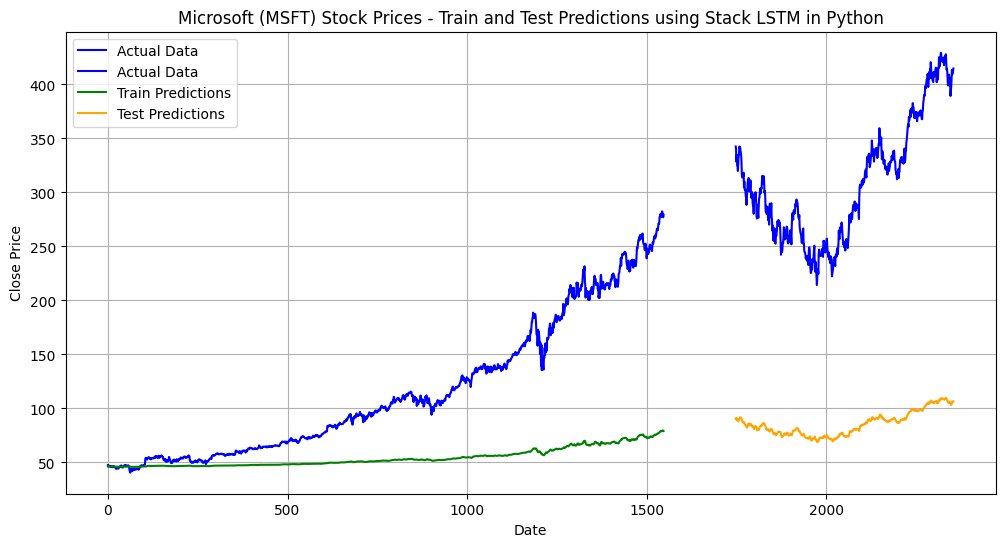

In [22]:
# Ensure that df1_scaled is also inverse transformed to original scale


# Plotting train and test predictions along with actual data


# Plotting train and test predictions along with actual data
plt.figure(figsize=(12, 6))

# Plotting actual data
plt.plot( df.index[:len(ytrain_act)],ytrain_act, label='Actual Data', color='blue')

plt.plot( df.index[-len(ytest_act):],ytest_act, label='Actual Data', color='blue')

# Plotting train predictions
plt.plot(df.index[:len(ytrain_pred)], ytrain_pred, label='Train Predictions', color='green')

# Plotting test predictions
plt.plot(df.index[-len(ytest_pred):], ytest_pred, label='Test Predictions', color='orange')

plt.title('Microsoft (MSFT) Stock Prices - Train and Test Predictions using Stack LSTM in Python')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
